# EDA - Utbetalda statlig medel

In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

df = pd.read_excel("data/ek_1_utbet_statliga_medel_utbomr.xlsx", skiprows=5)
df.head()

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Data/IT,109.192749,136.592343,154.726348,192.765796,211.257113,198.036024,203.249950,246.098128,356.251492,499.505111,566.211689,600.542099,665.038880
1,"Ekonomi, administration och försäljning",333.379221,373.196476,392.273449,397.432949,381.773874,406.235745,469.265158,549.522420,626.322157,677.605539,664.706433,645.379020,664.212939
2,Friskvård och kroppsvård,12.385036,12.129508,12.160803,11.943787,10.835978,7.151950,10.021599,12.640847,15.614295,18.105384,22.952224,23.312976,17.164001
3,"Hotell, restaurang och turism",76.257076,78.752007,81.725028,81.591173,78.335025,79.393923,83.923865,89.100543,102.670911,115.716079,110.391271,95.516479,100.372505
4,Hälso- och sjukvård samt socialt arbete,118.890913,130.518945,148.016792,174.665651,177.475662,194.507055,219.279194,257.937313,310.385978,356.077126,377.270519,359.356705,340.306947


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Utbildningsområde  18 non-null     object 
 1   2012               16 non-null     float64
 2   2013               16 non-null     float64
 3   2014               16 non-null     float64
 4   2015               16 non-null     float64
 5   2016               16 non-null     float64
 6   2017               16 non-null     float64
 7   2018               16 non-null     float64
 8   2019               16 non-null     float64
 9   2020               16 non-null     float64
 10  2021               16 non-null     float64
 11  2022               16 non-null     float64
 12  2023               16 non-null     float64
 13  2024               16 non-null     float64
dtypes: float64(13), object(1)
memory usage: 2.3+ KB


In [3]:
df.describe()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,160.054622,182.032823,192.626431,209.919411,217.528561,226.517624,245.702656,281.894825,343.591153,406.284864,425.974595,420.267826,441.198766
std,312.447356,355.348183,375.860856,408.108041,421.415543,439.028641,477.529309,548.633781,668.442469,790.482179,827.957822,817.502822,860.235522
min,6.285412,9.027900,8.867318,9.763824,10.800998,7.151950,7.231494,12.350178,15.614295,17.341442,12.816581,11.423875,12.337662
25%,12.308908,12.884751,17.880899,17.933423,17.475121,18.726247,20.569745,26.742336,28.900978,30.389242,34.325466,31.113579,29.340316
50%,66.513390,69.075877,68.646888,82.814337,95.107216,96.485001,98.903941,96.338603,104.614924,108.352147,107.072561,104.243081,113.642441
75%,125.359247,147.541905,162.542893,194.123231,214.314816,210.460508,235.049960,276.395727,371.866063,504.144553,539.444380,520.221083,552.084456
max,1280.436976,1456.262587,1541.011447,1679.355289,1740.228484,1812.140988,1965.621248,2255.158603,2748.729223,3250.278915,3407.796761,3362.142611,3529.590132


In [4]:
df.shape

(20, 14)

In [5]:
df.columns

Index(['Utbildningsområde',              '2012',              '2013',
                    '2014',              '2015',              '2016',
                      2017,                2018,                2019,
                      2020,                2021,                2022,
                      2023,                2024],
      dtype='object')

In [6]:
df.dtypes

Utbildningsområde     object
2012                 float64
2013                 float64
2014                 float64
2015                 float64
2016                 float64
2017                 float64
2018                 float64
2019                 float64
2020                 float64
2021                 float64
2022                 float64
2023                 float64
2024                 float64
dtype: object

In [7]:
df_query = duckdb.query("""SELECT * FROM df""").df().round()
df_query

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Data/IT,109.0,137.0,155.0,193.0,211.0,198.0,203.0,246.0,356.0,500.0,566.0,601.0,665.0
1,"Ekonomi, administration och försäljning",333.0,373.0,392.0,397.0,382.0,406.0,469.0,550.0,626.0,678.0,665.0,645.0,664.0
2,Friskvård och kroppsvård,12.0,12.0,12.0,12.0,11.0,7.0,10.0,13.0,16.0,18.0,23.0,23.0,17.0
3,"Hotell, restaurang och turism",76.0,79.0,82.0,82.0,78.0,79.0,84.0,89.0,103.0,116.0,110.0,96.0,100.0
4,Hälso- och sjukvård samt socialt arbete,119.0,131.0,148.0,175.0,177.0,195.0,219.0,258.0,310.0,356.0,377.0,359.0,340.0
5,Journalistik och information,8.0,12.0,19.0,21.0,19.0,20.0,23.0,28.0,30.0,29.0,29.0,26.0,23.0
6,Juridik,6.0,9.0,9.0,10.0,11.0,13.0,15.0,15.0,17.0,17.0,13.0,11.0,12.0
7,"Kultur, media och design",87.0,96.0,108.0,118.0,116.0,123.0,127.0,131.0,158.0,186.0,200.0,214.0,231.0
8,"Lantbruk, djurvård, trädgård, skog och fiske",52.0,55.0,49.0,56.0,64.0,67.0,65.0,69.0,83.0,91.0,104.0,112.0,127.0
9,Pedagogik och undervisning,18.0,18.0,21.0,20.0,23.0,28.0,31.0,45.0,51.0,67.0,75.0,64.0,46.0


In [8]:
educational_area = 'Data/IT'
df.query("Utbildningsområde == @educational_area").value_counts().reset_index()

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,count
0,Data/IT,109.192749,136.592343,154.726348,192.765796,211.257113,198.036024,203.24995,246.098128,356.251492,499.505111,566.211689,600.542099,665.03888,1


In [9]:
df["Utbildningsområde"].value_counts()

Utbildningsområde
Data/IT                                                                                                                                                                                                       1
Ekonomi, administration och försäljning                                                                                                                                                                       1
Friskvård och kroppsvård                                                                                                                                                                                      1
Hotell, restaurang och turism                                                                                                                                                                                 1
Hälso- och sjukvård samt socialt arbete                                                                                                               

In [10]:
data_it = df[df["Utbildningsområde"] == 'Data/IT'].round()
data_it

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Data/IT,109.0,137.0,155.0,193.0,211.0,198.0,203.0,246.0,356.0,500.0,566.0,601.0,665.0


In [11]:
df_2020 = df[['Utbildningsområde', 2020]].round()
df_2020.head()

,Utbildningsområde,2020
0,Data/IT,356.0
1,"Ekonomi, administration och försäljning",626.0
2,Friskvård och kroppsvård,16.0
3,"Hotell, restaurang och turism",103.0
4,Hälso- och sjukvård samt socialt arbete,310.0


In [12]:
df_2021 = df[['Utbildningsområde', 2021]].round()
df_2021.head()

,Utbildningsområde,2021
0,Data/IT,500.0
1,"Ekonomi, administration och försäljning",678.0
2,Friskvård och kroppsvård,18.0
3,"Hotell, restaurang och turism",116.0
4,Hälso- och sjukvård samt socialt arbete,356.0


In [13]:
df_2024 = df[['Utbildningsområde', 2024]].round()
df_2024

,Utbildningsområde,2024
0,Data/IT,665.0
1,"Ekonomi, administration och försäljning",664.0
2,Friskvård och kroppsvård,17.0
3,"Hotell, restaurang och turism",100.0
4,Hälso- och sjukvård samt socialt arbete,340.0
5,Journalistik och information,23.0
6,Juridik,12.0
7,"Kultur, media och design",231.0
8,"Lantbruk, djurvård, trädgård, skog och fiske",127.0
9,Pedagogik och undervisning,46.0


In [14]:
data_it = df[df["Utbildningsområde"] == 'Data/IT'].round()
data_it

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Data/IT,109.0,137.0,155.0,193.0,211.0,198.0,203.0,246.0,356.0,500.0,566.0,601.0,665.0


In [15]:
data_it_2024 = df[df['Utbildningsområde'] == 'Data/IT'][['Utbildningsområde', 2024]].round()
data_it_2024

,Utbildningsområde,2024
0,Data/IT,665.0


In [16]:
data_it_sql = duckdb.query("""SELECT "Utbildningsområde", "2024" FROM df WHERE "Utbildningsområde" = 'Data/IT'""").df().round()
data_it_sql

,Utbildningsområde,2024
0,Data/IT,665.0


In [17]:
data_it_2022 = df[df['Utbildningsområde'] == 'Data/IT'][['Utbildningsområde', 2022]].round()
data_it_2022

,Utbildningsområde,2022
0,Data/IT,566.0


<Axes: ylabel='Utbildningsområde'>

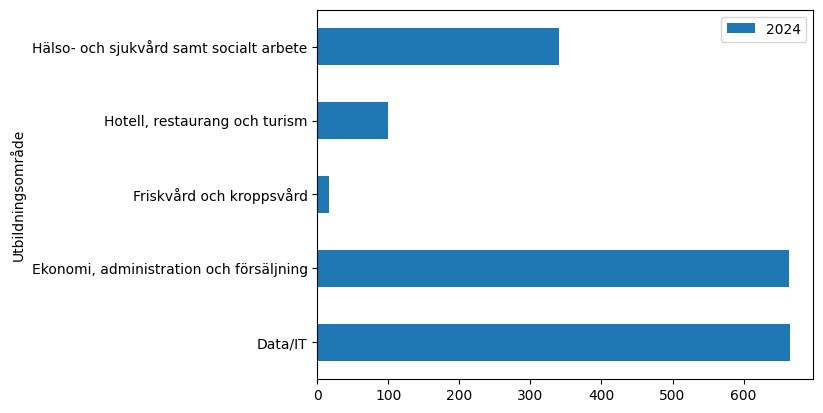

In [18]:
df_2024.head().plot(kind="barh", x='Utbildningsområde', y=2024)

<Axes: xlabel='Utbildningsområde', ylabel='Kronor i miljoner'>

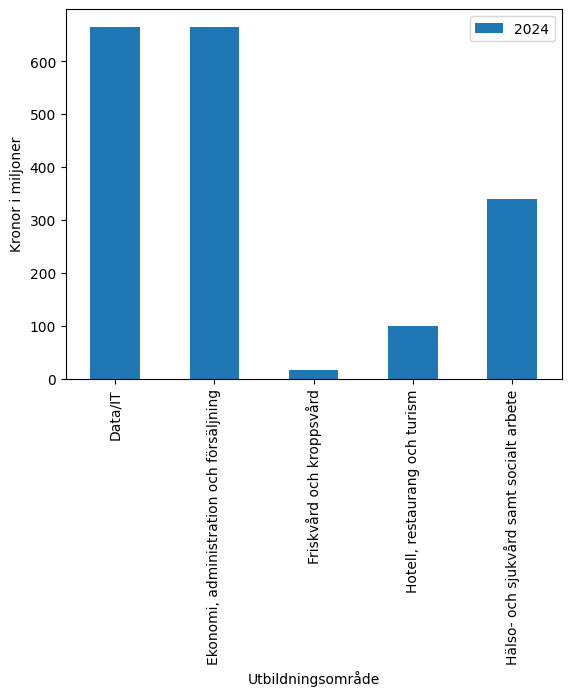

In [19]:
df_2024.head().plot(x='Utbildningsområde', y=2024, kind="bar", ylabel="Kronor i miljoner")

In [20]:
df_years = df[['Utbildningsområde', 2020, 2021, 2022, 2023, 2024]].round()
df_years

,Utbildningsområde,2020,2021,2022,2023,2024
0,Data/IT,356.0,500.0,566.0,601.0,665.0
1,"Ekonomi, administration och försäljning",626.0,678.0,665.0,645.0,664.0
2,Friskvård och kroppsvård,16.0,18.0,23.0,23.0,17.0
3,"Hotell, restaurang och turism",103.0,116.0,110.0,96.0,100.0
4,Hälso- och sjukvård samt socialt arbete,310.0,356.0,377.0,359.0,340.0
5,Journalistik och information,30.0,29.0,29.0,26.0,23.0
6,Juridik,17.0,17.0,13.0,11.0,12.0
7,"Kultur, media och design",158.0,186.0,200.0,214.0,231.0
8,"Lantbruk, djurvård, trädgård, skog och fiske",83.0,91.0,104.0,112.0,127.0
9,Pedagogik och undervisning,51.0,67.0,75.0,64.0,46.0


In [22]:
df_years.to_csv("data/utbetalda_statlig_medel_2020_2024.csv")